# Problem 1 :The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

# Problem 1.1

In [62]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("zomato.csv")
df = data[data["Country Code"] == 1]

## Replacing all city names in Delhi NCR region to NCR name

df['City'].replace("New Delhi", "NCR", inplace = True)
df['City'].replace("Noida", "NCR", inplace = True)
df['City'].replace("Ghaziabad", "NCR", inplace = True)
df['City'].replace("Gurgaon", "NCR", inplace = True)
df['City'].replace("Faridabad", "NCR", inplace = True)



C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


NCR restaurants :  7947
Rest of India restaurants :  705


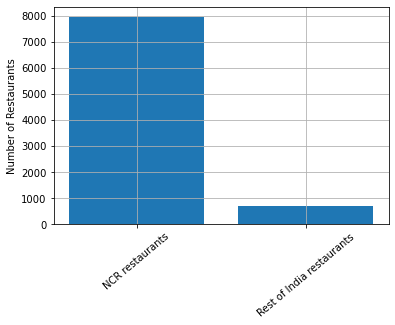

In [63]:
arr = df["City"].value_counts()
## After printing arr and also the dataset being highly skewed towards NCR it was found that the NCR had the most restraunts 
NCR_count = arr.values[0]

## The Rest of India count is simply the  difference of total restraunt data of India and the count of NCR
ROI_count = sum(arr.values) - NCR_count
print("NCR restaurants : ", NCR_count)
print("Rest of India restaurants : ", ROI_count)

x = ["NCR restaurants", "Rest of India restaurants"]
y = [NCR_count, ROI_count]

plt.bar(x, y, width = 0.8)
plt.xticks(rotation = 40)
plt.ylabel("Number of Restaurants")
plt.grid()
plt.show()

# Problem 1.2

In [64]:
## In Cuisine Name removing all space makes it easier to handle as we do not need to woory about an added space in the name or 
## the beginning. The names though do not look pretty, are readable and solves many challenges.

df['Cuisines'] = df['Cuisines'].apply(lambda x : str(x).replace(" ",""))

## Maintaining two Boolean Hashmaps keeps record of the cusines found in restraunts of NCR and Rest of India

NCR_cusines = {}
ROI_cusines = {}
def find_NCR(obj) :
    arr = obj.split(",")
    for ele in arr :
        NCR_cusines[ele] = True
        
    return obj

def find_ROI(obj) :
    arr = obj.split(",")
    for ele in arr :
        ROI_cusines[ele] = True
        
    return obj
    

NCR_df = df[df['City'] == "NCR"]
NCR_df["Cuisines"] = NCR_df["Cuisines"].apply(find_NCR)

ROI_df = df[df['City'] != "NCR"]
ROI_df["Cuisines"] = ROI_df["Cuisines"].apply(find_ROI)

Not_in_NCR = list()

## If we get a cuisine that has a False value in our NCR_cuisines haspmap, we append it in the Not_in_NCR list

for ele in ROI_cusines :
    if NCR_cusines.get(ele, False) is True :
        continue 
        
    else :
        Not_in_NCR.append(ele)
        
for ele in Not_in_NCR :
    print(ele)



German
Malwani
BBQ
Cajun


<ipython-input-64-2a20a996734f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisines'] = df['Cuisines'].apply(lambda x : str(x).replace(" ",""))
<ipython-input-64-2a20a996734f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCR_df["Cuisines"] = NCR_df["Cuisines"].apply(find_NCR)
<ipython-input-64-2a20a996734f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [65]:
import requests
## We have defined this function to get cuisine_id, We will only get an answer if such a cuisine is served in an NCR_restraunt
## using the API

def Check_NCR(cusine):
    user_key = '3754f0440b3026cde542ed69af9f499a' 
    basic_api = 'https://developers.zomato.com/api/v2.1' 
    header = {"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key}
    ## We found that city_id for Delhi_NCR is 1 so we limit our API call to city_id == 1
    params = {'city_id' : 1}
    response = requests.get(basic_api + '/cuisines', headers = header, params = params) 
    for i in response.json().get("cuisines") :
        if i.get('cuisine').get('cuisine_name') == cusine :
            print(i.get('cuisine').get('cuisine_name'), i.get('cuisine').get('cuisine_id'))
            
for ele in Not_in_NCR :
    Check_NCR(ele)

BBQ 193


# So clearly, of the 4 cuisines that were found to be not served in any NCR restaurant, 1, BBQ is served in some NCR Restaurants. For instance following is the list of 10 BBQ Restraunts that are nearest to the Coding Ninjas Campus

In [66]:
user_key='3754f0440b3026cde542ed69af9f499a' 
basic_api='https://developers.zomato.com/api/v2.1'
 
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key} 
cuisine_id = 193 
params = {'lat' : 28.697513, 'lon' : 77.140681, 'sort':'real_distance', 'cuisines':cuisine_id, 'count':10} 
response = requests.get(basic_api + '/search', headers = header, params = params)

for i in response.json().get('restaurants'): 
    print(i.get('restaurant').get('name'))

Peshawari Kohat Wale
Tandoori Nights
UBQ by Barbeque Nation
Barbeque Nation
Jungal Raaj
Anytime Chicken
UBQ by Barbeque Nation
Moet's Barbeque
The Tangdi Club
BBQ Express By The Barbeque Company


# Problem 1.3

In [67]:
## To find the Top 10 cuisines served the most, we maintained hashamaps for the NCR region and Rest of India separately
## The hashmap contained the number of restaurants where the corresponding cuisine is served.
## Comparison is done based on the percentage of restaurants serving for more clarity and better accuracy

NCR_cusines = {}
ROI_cusines = {}
def find_NCR(obj) :
    arr = obj.split(",")
    for ele in arr :
        NCR_cusines[ele] = NCR_cusines.get(ele, 0) + 1
        
    return obj

def find_ROI(obj) :
    arr = obj.split(",")
    for ele in arr :
        ROI_cusines[ele] = ROI_cusines.get(ele, 0) + 1
        
    return obj
    

NCR_df = df[df['City'] == "NCR"]
NCR_df["Cuisines"] = NCR_df["Cuisines"].apply(find_NCR)

ROI_df = df[df['City'] != "NCR"]
ROI_df["Cuisines"] = ROI_df["Cuisines"].apply(find_ROI)

count_ROI = list()
count_NCR = list()
cuisines_NCR = list()
cuisines_ROI = list()

print("The Top 10 cuisines served in the restaurants of NCR : ")
print()
## To sort a dictionary, convert it to a pandas dataframe and then using a pre defined dataframe.sort_values
dataf_NCR = pd.DataFrame(list(NCR_cusines.values()), list(NCR_cusines.keys()))
dataf_NCR = dataf_NCR.sort_values(by = [0], ascending = False)
for i in range(10) :
    print(dataf_NCR.index[i], round((dataf_NCR.values[i][0]/ NCR_count) * 100, 2))
    count_NCR.append(round((dataf_NCR.values[i][0]/ NCR_count) * 100, 2))
    cuisines_NCR.append(dataf_NCR.index[i])
    
print()
print("The Top 10 cuisines served in the restaurants of the rest of India : ")
print()
dataf_ROI = pd.DataFrame(list(ROI_cusines.values()), list(ROI_cusines.keys()))
dataf_ROI = dataf_ROI.sort_values(by = [0], ascending = False)
for i in range(10) :
    print(dataf_ROI.index[i], round((dataf_ROI.values[i][0] / ROI_count) * 100 , 2))
    count_ROI.append(round((dataf_ROI.values[i][0] / ROI_count) * 100 , 2))
    cuisines_ROI.append(dataf_ROI.index[i])
    

The Top 10 cuisines served in the restaurants of NCR : 

NorthIndian 45.26
Chinese 30.8
FastFood 23.48
Mughlai 11.74
Bakery 8.77
SouthIndian 7.16
Continental 6.88
Desserts 6.82
StreetFood 6.77
Italian 6.73

The Top 10 cuisines served in the restaurants of the rest of India : 

NorthIndian 49.5
Chinese 34.33
Continental 25.11
Italian 20.85
Cafe 19.29
FastFood 13.76
SouthIndian 8.79
Mughlai 8.37
Desserts 7.8
Mexican 7.09


<ipython-input-67-22bab432e36a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCR_df["Cuisines"] = NCR_df["Cuisines"].apply(find_NCR)
<ipython-input-67-22bab432e36a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROI_df["Cuisines"] = ROI_df["Cuisines"].apply(find_ROI)


# Problem 1.4

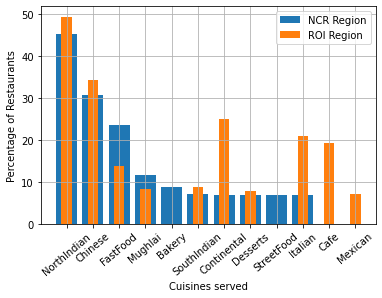

In [104]:
plt.bar(cuisines_NCR, count_NCR, width = 0.8, label = "NCR Region")
plt.bar(cuisines_ROI, count_ROI, width = 0.4, label = "ROI Region")
plt.xticks(rotation = 40)
plt.ylabel("Percentage of Restaurants")
plt.xlabel("Cuisines served")
plt.grid()
plt.legend()
plt.show()

## The most intutive type of graph would have been the Pie Chart, However that type of  chart would not be accurate
## The reason behind its inaccuracy is that many restaurants serve more than 1 cuisine.
## The percentage in the bar plot shows that, for example North Indian is served in 46.25 percent of Delhi NCR restaurants.

# For inference refer the attached PDF

# Problem 2 : User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

# Problem 2.1.1 : User Rating v/s Number of Votes

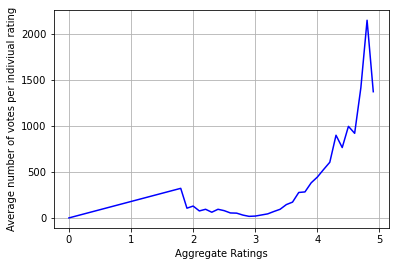

In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## The logic here is that we are calculating average Number of votes given per rating.
## Let's say there are two restaurants with rating 4.1. One restaurant got 10, the other got 20 votes.
## So to get a 4.1 rating, a restaurant should have on an average (10 + 20)/ 2 = 15 votes casted.

data = pd.read_csv("zomato.csv")

## Mind that we are considering Indian Restaurants only.
data = data[data["Country Code"] == 1]
df_votes = data[['Aggregate rating', 'Votes']]

arr = df_votes["Aggregate rating"].value_counts()
Votes_avg = {}
for i in range(len(arr)) :
    
    ## Average Calculation
    avg = df_votes[df_votes["Aggregate rating"] == arr.index[i]]["Votes"].sum()
    avg = avg // arr.values[i]
    
    ## storing in a hashmap
    Votes_avg[arr.index[i]] = avg

## Converting haspmap to a 2D list and sorting
ratings = [[key, value] for key, value in Votes_avg.items()]
ratings.sort()

Votes = [ele[1] for ele in ratings]
rating_g = [ele[0] for ele in ratings]
plt.plot(rating_g, Votes, "b-")
plt.grid()
plt.xlabel("Aggregate Ratings")
plt.ylabel("Average number of votes per indiviual rating")
plt.show()


# Problem 2.1.2 : User Rating v/s Number of Cuisines

<ipython-input-71-80663afef4bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuisines['Cuisines'] = df_cuisines['Cuisines'].apply(lambda x : str(x).replace(" ",""))
<ipython-input-71-80663afef4bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuisines["Cuisines"] = df_cuisines["Cuisines"].astype(str) + ";" + df_cuisines["Aggregate rating"].astype(str)


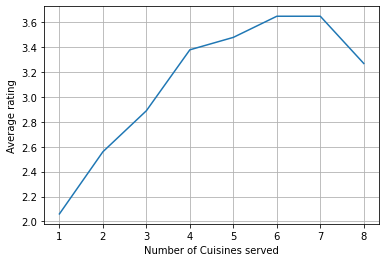

In [71]:
df_cuisines = data[['Cuisines', 'Aggregate rating']]
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].apply(lambda x : str(x).replace(" ",""))
df_cuisines["Cuisines"] = df_cuisines["Cuisines"].astype(str) + ";" + df_cuisines["Aggregate rating"].astype(str)

## The logic here is that we are calculating the average rating given to a restautant serving specific number of cuisines.
## Lets say there are 3 restaurants serving 2 cuisines with ratings 4.1, 3.6 and 4.6 .
## So on average, a restaurant serving 2 cuisines gets (4.1 + 3.6 + 4.6) / 3 = 4.1 .

rating_cuisines = {}

def find_Number(obj) :
    arr = obj.split(";")
    rating = float(arr[1])
    num = len(arr[0].split(","))
    if num not in rating_cuisines :
        rating_cuisines[num] = [rating, 1]
        
    else :
        rating_cuisines[num][0] += rating
        rating_cuisines[num][1] += 1
    

df_cuisines["Cuisines"].apply(find_Number)
rating_cuisines_list = [[key, round(value[0] / value[1], 2)] for key, value in rating_cuisines.items()]
rating_cuisines_list.sort()
x = [ele[0] for ele in rating_cuisines_list]
y = [ele[1] for ele in rating_cuisines_list]
plt.plot(x, y)
plt.xlabel("Number of Cuisines served")
plt.ylabel("Average rating")
plt.grid()
plt.show()


# Problem 2.1.3 :  User Rating v/s Average Cost

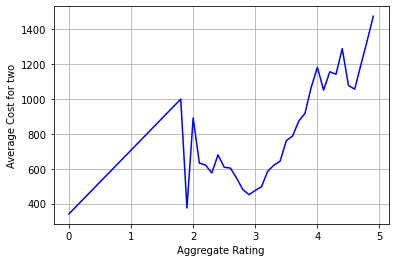

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("zomato.csv")

## Mind that we are considering Indian Restaurants only.

data = data[data["Country Code"] == 1]

## The logic here is similar to Problem 2.1.1.
## We are calculating the average cost of two for a restaurant with a specific rating.
## let's say there are 2 restaurants with rating 3.5 having average cost of two as 1000 and 1500 respectively
## So at a restaurant with rating 3.5, the average cost for two is (1000 + 1500) / 2 = 1250. 

df_cost = data[['Aggregate rating', "Average Cost for two"]]

arr = df_cost["Aggregate rating"].value_counts()
Votes_avg = {}
for i in range(len(arr)) :
    avg = df_cost[df_cost["Aggregate rating"] == arr.index[i]]["Average Cost for two"].sum()
    avg = avg // arr.values[i]
    Votes_avg[arr.index[i]] = avg
    
ratings = [[key, value] for key, value in Votes_avg.items()]
ratings.sort()

Cost = [ele[1] for ele in ratings]
rating_g = [ele[0] for ele in ratings]
plt.plot(rating_g, Cost, "b-")
plt.xlabel("Aggregate Rating")
plt.ylabel("Average Cost for two")
plt.grid()
plt.show()

# Problem 2.1.4 : User Rating vs Specific Cuisine

[]

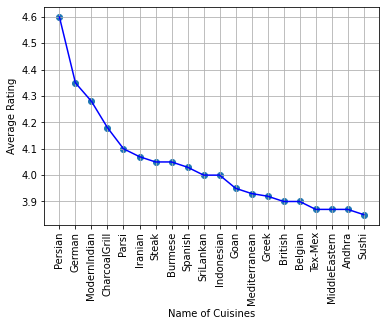

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Here we are calculating the rating restaurants got serving some specific cuisine.
## Let's say there are three restaurants serving North Indian who got ratings as 4, 3, 3.5, 3.5. 
## So on average, a restaurant serving North Indian gets a rating of 3.5.

data = pd.read_csv("zomato.csv")

## Mind that we are considering only Indian Restaurants.
data = data[data["Country Code"] == 1]
data["Cuisines"] = data["Cuisines"].apply(lambda x : str(x).replace(" ",""))
cuisines = np.array(data["Cuisines"])
rating = np.array(data["Aggregate rating"])

cuisines_rating = {}
for i in range(len(cuisines)) :
    arr = cuisines[i].split(",")
    for ele in arr :
        if ele not in cuisines_rating :
            cuisines_rating[ele] = [rating[i], 1]
            
        else :
            cuisines_rating[ele][0] += rating[i]
            cuisines_rating[ele][1] += 1
            
final_list = []
            
for ele in cuisines_rating :
    cuisines_rating[ele] = round((cuisines_rating[ele][0] / cuisines_rating[ele][1]), 2)
    final_list.append([cuisines_rating[ele], ele])
    
final_list.sort(reverse = True)
    
rating = [final_list[i][0] for i in range(20)]
cuisines_name = [final_list[i][1] for i in range(20)]
plt.plot(cuisines_name, rating, "b-")
plt.scatter(cuisines_name, rating)
plt.grid()
plt.xticks(rotation = 90)
plt.xlabel("Name of Cuisines")
plt.ylabel("Average Rating")
plt.plot()

# Problem 2.2 : Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("zomato.csv")
## Mind that we are considering only Indian Localites.
data = data[data["Country Code"] == 1]
df = data[["Votes", "Aggregate rating", "Locality"]]
df["Weight"] = df["Votes"] * df["Aggregate rating"]
area = df["Locality"].unique()

Weighted_rating = {}
for ele in area :
    sum_num = df[df["Locality"] == ele]["Weight"].sum()
    sum_deno = df[df["Locality"] == ele]["Votes"].sum()
    Weighted_rating[ele] = sum_num / sum_deno

dat = pd.DataFrame(list(Weighted_rating.values()), list(Weighted_rating.keys()))
dat = dat.sort_values(by = [0], ascending = False)
for i in range(10) :
    print(dat.index[i], round(dat.values[i][0], 2))

<ipython-input-4-80c3296508af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weight"] = df["Votes"] * df["Aggregate rating"]
<ipython-input-4-80c3296508af>:14: RuntimeWarning: invalid value encountered in double_scalars
  Weighted_rating[ele] = sum_num / sum_deno


Aminabad 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


# Problem 3 : Visualisation 

# Problem 3.1

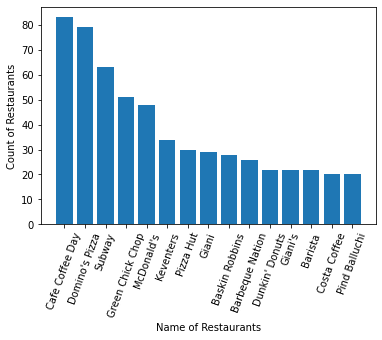

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv("zomato.csv")

arr = data["Restaurant Name"].value_counts()
name = list(arr.index[0 : 15])
count = list(arr.values[0 : 15])
plt.bar(name, count)
plt.xticks(rotation = 70)
plt.xlabel("Name of Restaurants")
plt.ylabel("Count of Restaurants")
plt.show()

# Problem 3.2

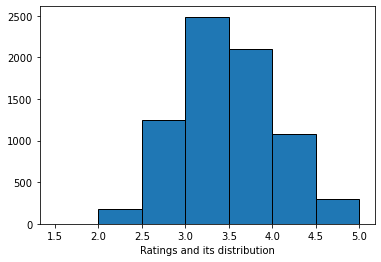

In [84]:
data_1 = data[data["Aggregate rating"] != 0]
bins = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.hist(data_1["Aggregate rating"], edgecolor = "black", bins = bins)
plt.xlabel("Ratings and its distribution")
plt.show()

# Problem 3.3

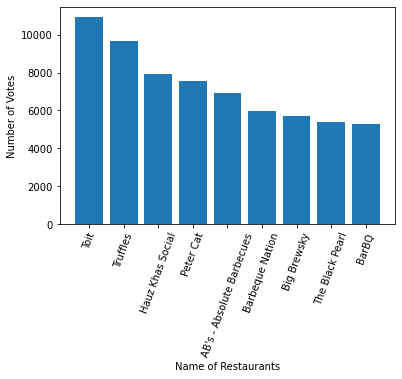

In [85]:
data = data.sort_values(by = ["Votes"], ascending = False)
x = data["Restaurant Name"][0 : 10]
y = data["Votes"][0 : 10]
plt.bar(x, y)
plt.xticks(rotation = 70)
plt.xlabel("Name of Restaurants")
plt.ylabel("Number of Votes")
plt.show()

# Problem 3.4

<ipython-input-86-77cd4e5a1cd8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US["Cuisines"] = data_US["Cuisines"].apply(lambda x : str(x).replace(" ",""))


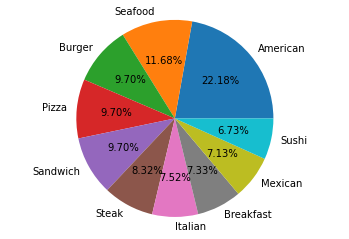

In [86]:
data_US = data[data["Country Code"] == 216]

US_cuisines = {}

def sep(obj) :
    arr = obj.split(",")
    for ele in arr :
        US_cuisines[ele] = US_cuisines.get(ele, 0) + 1
        
    return obj

data_US["Cuisines"] = data_US["Cuisines"].apply(lambda x : str(x).replace(" ",""))
data_US["Cuisines"].apply(sep)
dat_US = pd.DataFrame(list(US_cuisines.values()), list(US_cuisines.keys()))
dat_US = dat_US.sort_values(by = [0], ascending = False)
values = list()
legend = list()
for i in range(10) :
    values.append(dat_US.values[i][0])
    legend.append(dat_US.index[i])
plt.pie(values, labels = legend, autopct="%.2f%%")
plt.axis("equal")
plt.show()

# Problem 3.5

<ipython-input-12-8fcb3935b81b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weight"] = df["Votes"] * df["Aggregate rating"]


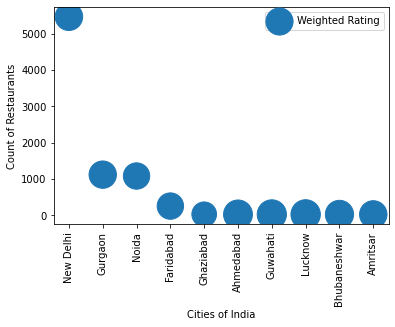

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("zomato.csv")
data = data[data["Country Code"] == 1]
df = data[["Votes", "Aggregate rating", "City"]]
df["Weight"] = df["Votes"] * df["Aggregate rating"]
area = df["City"].unique()

City_rest = {}
Weighted_rating = {}
for ele in area :
    City_rest[ele] = df[df["City"] == ele]["Aggregate rating"].count()
    sum_num = df[df["City"] == ele]["Weight"].sum()
    sum_deno = df[df["City"] == ele]["Votes"].sum()
    Weighted_rating[ele] = sum_num / sum_deno

dat = pd.DataFrame(list(City_rest.values()), list(City_rest.keys()))
dat = dat.sort_values(by = [0], ascending = False)
city_name = list()
sizes = list()
number_rest = list()
for i in range(10) :
    city_name.append(dat.index[i]) 
    sizes.append(round(Weighted_rating[dat.index[i]], 2)*200)
    number_rest.append(dat.values[i][0])
    
plt.scatter(city_name, number_rest, sizes = sizes, label = "Weighted Rating")
plt.xticks(rotation = 90)
plt.xlabel("Cities of India")
plt.ylabel("Count of Restaurants")
plt.legend()
plt.show()